In [13]:
import keras
import numpy as np
import tensorflow as tf
from keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from datetime import datetime
from tkinter import *

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the images
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape images to (28, 28, 1) for CNN input
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the CNN model
model = Sequential([
    Input(shape=(28, 28, 1)),  
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Save the model for later use
model.save('cnn_mnist_model.keras')


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.7570 - loss: 0.7323 - val_accuracy: 0.9770 - val_loss: 0.0685
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9592 - loss: 0.1345 - val_accuracy: 0.9842 - val_loss: 0.0473
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9712 - loss: 0.0984 - val_accuracy: 0.9857 - val_loss: 0.0382
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.9759 - loss: 0.0796 - val_accuracy: 0.9885 - val_loss: 0.0340
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9795 - loss: 0.0686 - val_accuracy: 0.9876 - val_loss: 0.0360
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9803 - loss: 0.0632 - val_accuracy: 0.9899 - val_loss: 0.0275
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.9832 - loss: 0.0563 - val_accuracy: 0.9910 - val_loss: 0.0273
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.9847 - loss: 0.0494 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


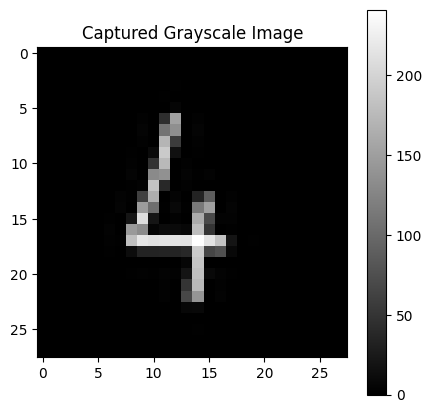

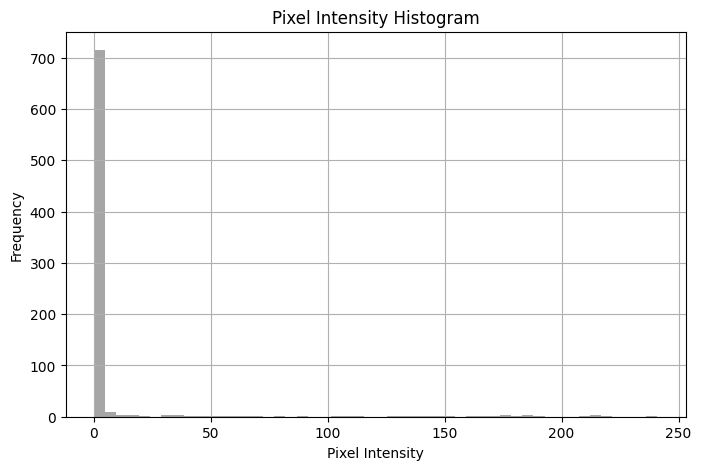

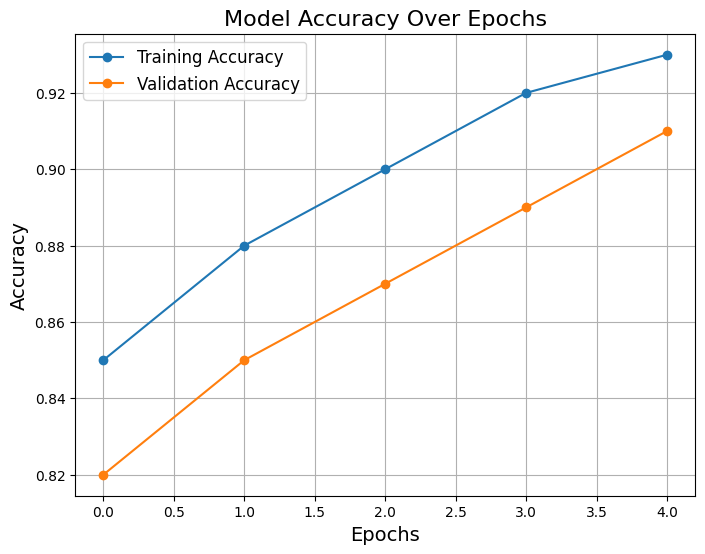

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


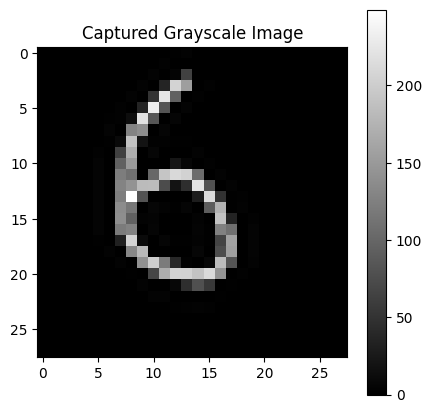

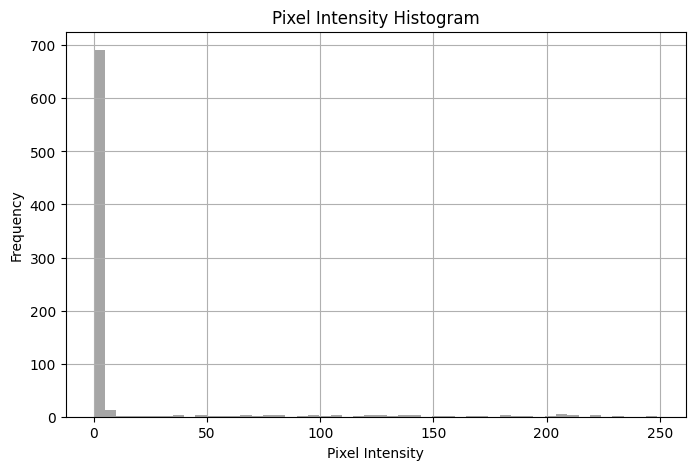

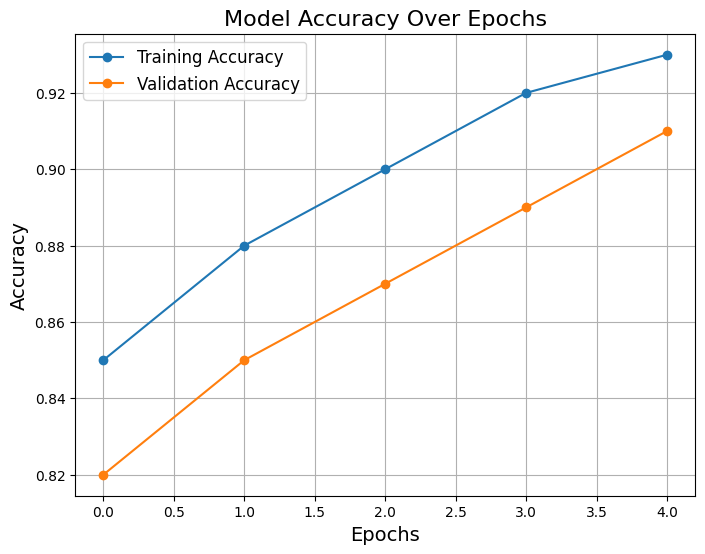

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


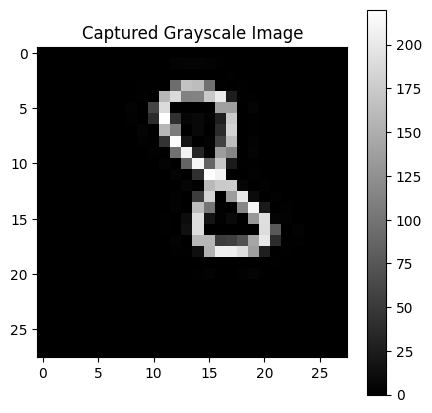

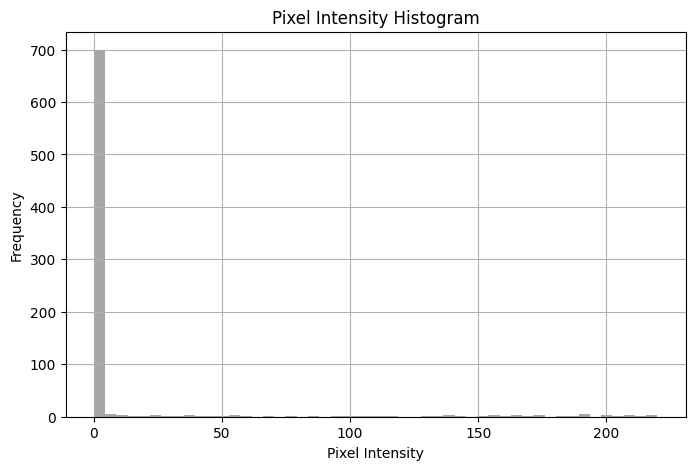

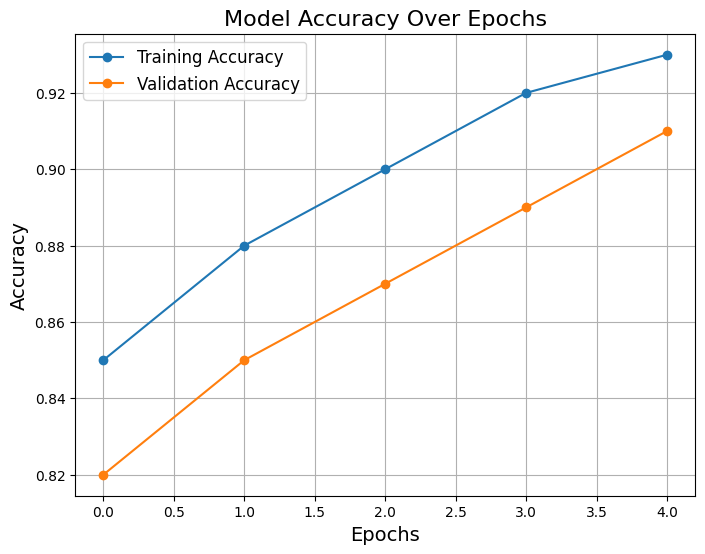

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


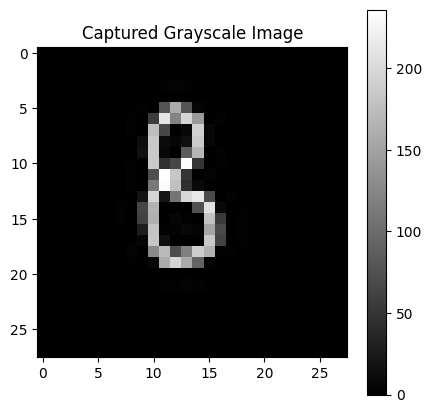

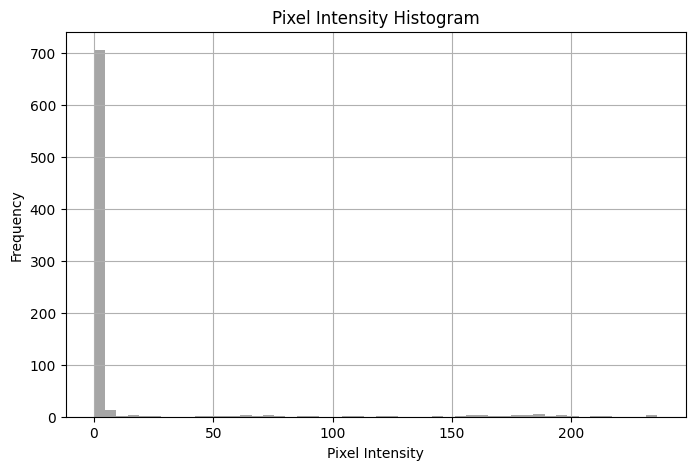

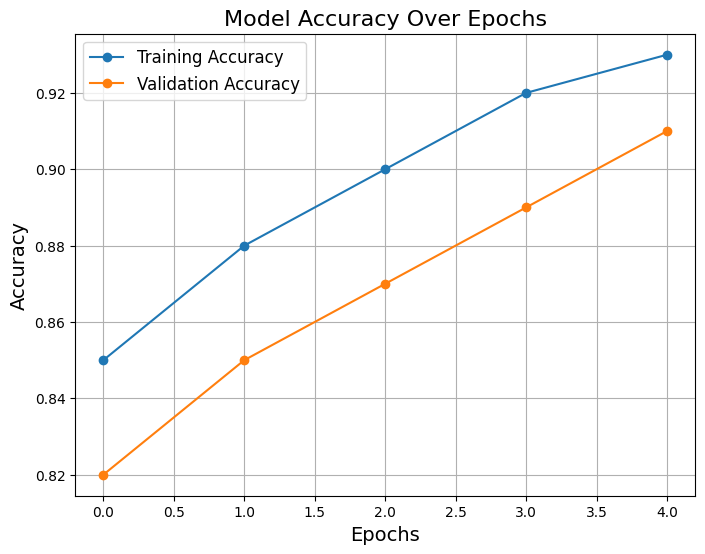

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


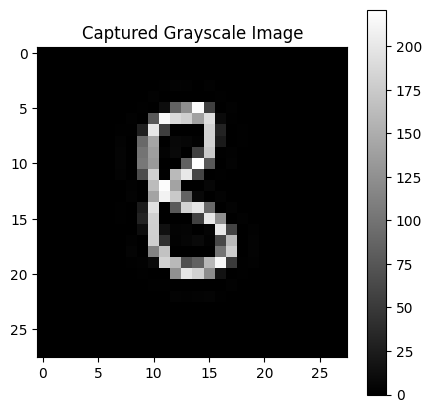

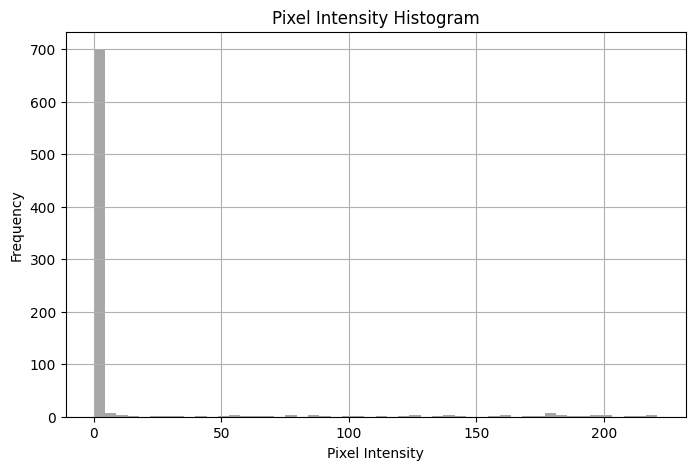

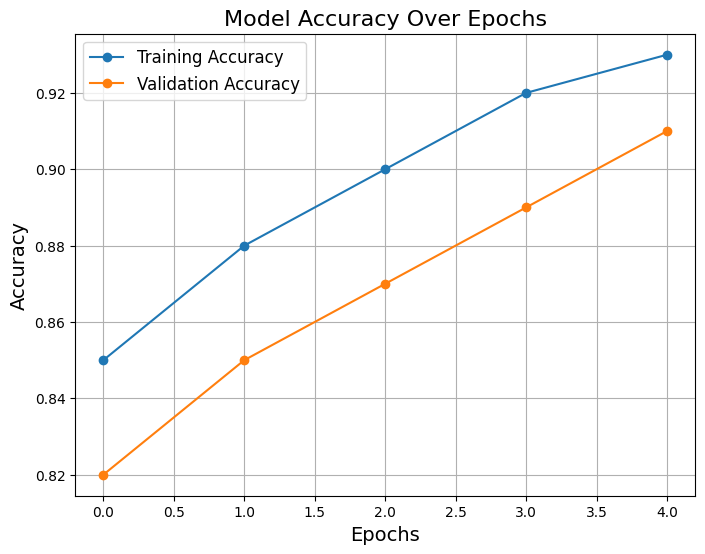

In [14]:
# GUI for handwritten digit recognition
from PIL import Image, ImageDraw, ImageOps
import matplotlib.pyplot as plt
window = Tk()
window.title("Handwritten Digit Recognition with CNN")
drawing_image = Image.new("L", (350, 290), "black")
draw = ImageDraw.Draw(drawing_image)
predictions = []
timestamps = []
mock_history = {
    'accuracy': [0.85, 0.88, 0.90, 0.92, 0.93],
    'val_accuracy': [0.82, 0.85, 0.87, 0.89, 0.91]
}

def predict_digit():
    global drawing_image
    # Resize and preprocess the image
    img_resized = drawing_image.resize((28, 28), Image.Resampling.LANCZOS)
    img_array = np.asarray(img_resized).reshape(1, 28, 28, 1) / 255.0
    
    # Predict the digit
    prediction = model.predict(img_array)
    digit = np.argmax(prediction)
    confidence = np.max(prediction) * 100

    # Display result
    result_label.config(text=f"Predicted Digit: {digit}\nConfidence: {confidence:.2f}%")
    # Show the captured grayscale image
    show_grayscale_image(img_resized)
    
    # Show pixel intensity histogram
    plot_pixel_histogram(img_resized)

    # Show prediction graph over time
    plot_predictions()
    
    #show accuracy graph
    plot_accuracy(mock_history)
def show_grayscale_image(image):
    plt.figure(figsize=(5, 5))
    plt.title("Captured Grayscale Image")
    plt.imshow(np.asarray(image), cmap='gray')
    plt.colorbar()
    plt.show()

def plot_pixel_histogram(image):
    image_array = np.asarray(image)
    plt.figure(figsize=(8, 5))
    plt.hist(image_array.flatten(), bins=50, color='gray', alpha=0.7)
    plt.title("Pixel Intensity Histogram")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

def plot_predictions():
    if len(predictions) > 0:
        plt.figure(figsize=(8, 5))
        plt.plot(timestamps, predictions, marker='o', label="Predicted Digit")
        plt.title("Predicted Digits Over Time")
        plt.xlabel("Timestamp")
        plt.ylabel("Predicted Digit")
        plt.grid(True)
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history['accuracy'], label='Training Accuracy', marker='o')
    plt.plot(history['val_accuracy'], label='Validation Accuracy', marker='o')
    plt.title('Model Accuracy Over Epochs', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.grid(True)
    plt.legend(fontsize=12)
    plt.show()
def clear_canvas():
    global drawing_image, draw
    cv.delete("all")
    drawing_image = Image.new("L", (350, 290), "black")
    draw = ImageDraw.Draw(drawing_image)

def activate_paint(event):
    global lastx, lasty
    lastx, lasty = event.x, event.y

def draw_lines(event):
    global lastx, lasty, draw
    x, y = event.x, event.y
    cv.create_line((lastx, lasty, x, y), width=10, fill='white', capstyle=ROUND, smooth=TRUE, splinesteps=12)
    draw.line((lastx, lasty, x, y), fill="white", width=10)
    lastx, lasty = x, y
    
# GUI layout
cv = Canvas(window, width=350, height=290, bg='black')
cv.grid(row=0, column=0, columnspan=2, padx=10, pady=10)
cv.bind('<Button-1>', activate_paint)
cv.bind('<B1-Motion>', draw_lines)

predict_button = Button(window, text="Predict", command=predict_digit, bg="green", fg="white")
predict_button.grid(row=1, column=0, pady=10)

clear_button = Button(window, text="Clear", command=clear_canvas, bg="red", fg="white")
clear_button.grid(row=1, column=1, pady=10)


result_label = Label(window, text="Draw a digit and click Predict!", font=('Helvetica', 14))
result_label.grid(row=2, column=0, columnspan=2, pady=10)

window.mainloop()